In [8]:
import pandas as pd
import numpy
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20000)

In [9]:
df = pd.read_csv('/content/fraud test.csv')

In [10]:
df = df.sort_values(by='is_fraud', ascending=False)

In [11]:
df = df.head(20000)

In [12]:
df.shape

(20000, 23)

In [13]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,17855
1,2145


In [14]:
df.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
262538,262538,26/09/2020 11:55,4.646850e+18,"fraud_Jenkins, Hauck and Friesen",gas_transport,9.54,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.732,-73.1,4056,Film/video editor,25/06/1990,5b2d847161e767ff46f7c1ffc4821dc5,1380196516,41.252963,-73.819864,1


In [15]:
# Load Data: Read the CSV file into a DataFrame.
# Sort and Subset: Sort the data by the is_fraud column (fraudulent transactions first) and keep the first 20,000 rows.
# Inspect Data: Check the shape of the dataframe and count of fraud vs. non-fraud cases.

In [42]:
# Display information about the dataset including the data types and number of non-null values
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 262538 to 352706
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             20000 non-null  int64         
 1   trans_date_trans_time  20000 non-null  datetime64[ns]
 2   cc_num                 20000 non-null  float64       
 3   merchant               20000 non-null  object        
 4   category               20000 non-null  object        
 5   amt                    20000 non-null  float64       
 6   first                  20000 non-null  object        
 7   last                   20000 non-null  object        
 8   gender                 20000 non-null  object        
 9   street                 20000 non-null  object        
 10  city                   20000 non-null  object        
 11  state                  20000 non-null  object        
 12  zip                    2000

In [41]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
year_of_trans            0
month_of_trans           0
day_of_trans             0
hour_of_trans            0
minute_of_trans          0
second_of_trans          0
day_of_week_trans        0
day_of_year_trans        0
weekend_of_trans         0
quarter_of_trans         0
dtype: int64


In [22]:
df.duplicated().sum()

0

In [17]:
from datetime import datetime

In [26]:
# datetime.now()
pd.Timestamp.now()

Timestamp('2024-08-30 12:28:14.259592')

In [27]:
df['dob'] = pd.to_datetime(df['dob'], format='mixed')

In [28]:
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days / 365

In [29]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['day_of_year'] = df['trans_date_trans_time'].dt.dayofyear
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['quarter'] = df['trans_date_trans_time'].dt.quarter

<ipython-input-29-c5ff98694978>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [38]:
df.rename(columns={'year':'year_of_trans'}, inplace=True)
df.rename(columns={'month':'month_of_trans'}, inplace=True)
df.rename(columns={'day':'day_of_trans'}, inplace=True)
df.rename(columns={'hour':'hour_of_trans'}, inplace=True)
df.rename(columns={'minute':'minute_of_trans'}, inplace=True)
df.rename(columns={'second':'second_of_trans'}, inplace=True)
df.rename(columns={'day_of_week':'day_of_week_trans'}, inplace=True)
df.rename(columns={'day_of_year':'day_of_year_trans'}, inplace=True)
df.rename(columns={'weekend':'weekend_of_trans'}, inplace=True)
df.rename(columns={'quarter':'quarter_of_trans'}, inplace=True)

In [30]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,year,month,day,hour,minute,second,day_of_week,day_of_year,weekend,quarter
262538,262538,2020-09-26 11:55:00,4.646850e+18,"fraud_Jenkins, Hauck and Friesen",gas_transport,9.54,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.7320,-73.1000,4056,Film/video editor,1990-06-25,5b2d847161e767ff46f7c1ffc4821dc5,1380196516,41.252963,-73.819864,1,34.205479,2020,9,26,11,55,0,5,270,1,3
90114,90114,2020-07-22 02:22:00,4.195740e+12,"fraud_Olson, Becker and Koch",gas_transport,9.31,Benjamin,Robinson,M,0701 John Ranch,Portland,OR,97210,45.5303,-122.7033,841711,"Engineer, building services",1963-04-04,bb07c9171256dce872000c1766c15854,1374459737,44.901522,-122.600140,1,61.449315,2020,7,22,2,22,0,2,204,0,3


In [32]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 89.28 % of the dataset
Frauds 10.72 % of the dataset


In [33]:
#here we Notice how imbalanced is our original dataset
#Most of the transactions are non-fraud. If we use this dataframe as the
#base for our predictive models and analysis we might get a
#lot of errors and our algorithms will probably overfit since
#it will "assume" that most transactions are not fraud. But we
#don't want our model to assume, we want our model to detect
#patterns that give signs of fraud.

In [34]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,17855
1,2145


<Axes: xlabel='is_fraud'>

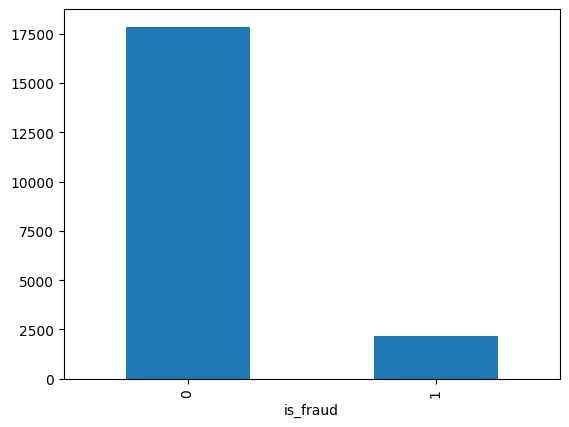

In [35]:
df['is_fraud'].value_counts().plot(kind = 'bar')

In [36]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,year,month,day,hour,minute,second,day_of_week,day_of_year,weekend,quarter
262538,262538,2020-09-26 11:55:00,4.646850e+18,"fraud_Jenkins, Hauck and Friesen",gas_transport,9.54,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.7320,-73.1000,4056,Film/video editor,1990-06-25,5b2d847161e767ff46f7c1ffc4821dc5,1380196516,41.252963,-73.819864,1,34.205479,2020,9,26,11,55,0,5,270,1,3
90114,90114,2020-07-22 02:22:00,4.195740e+12,"fraud_Olson, Becker and Koch",gas_transport,9.31,Benjamin,Robinson,M,0701 John Ranch,Portland,OR,97210,45.5303,-122.7033,841711,"Engineer, building services",1963-04-04,bb07c9171256dce872000c1766c15854,1374459737,44.901522,-122.600140,1,61.449315,2020,7,22,2,22,0,2,204,0,3
309694,309694,2020-10-16 22:53:00,4.306590e+15,fraud_Morissette LLC,entertainment,398.89,Renee,Walls,F,86542 Jessica Fords Apt. 706,Veedersburg,IN,47987,40.1186,-87.2602,4049,"Development worker, community",1959-10-19,c65060e35aeaef63d4239e8713b6759a,1381964008,39.421318,-87.133560,1,64.909589,2020,10,16,22,53,0,4,290,0,4
114560,114560,2020-07-31 12:03:00,1.800110e+14,fraud_Dooley-Thompson,misc_net,780.45,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,61272,41.2153,-90.9879,1504,Manufacturing engineer,1993-05-10,9c1863f09e11a14aa571fb7ba0e3e7a5,1375272189,41.309914,-90.273864,1,31.328767,2020,7,31,12,3,0,4,213,0,3
308053,308053,2020-10-16 03:01:00,3.004240e+13,fraud_Huel Ltd,misc_net,714.25,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,NY,11768,40.9051,-73.3309,21902,Tour manager,1976-05-16,1537ced82ebd3654b8431608c59e712e,1381892484,41.436488,-74.172564,1,48.323288,2020,10,16,3,1,0,4,290,0,4


In [37]:
df.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,year,month,day,hour,minute,second,day_of_week,day_of_year,weekend,quarter
262538,262538,2020-09-26 11:55:00,4.646850e+18,"fraud_Jenkins, Hauck and Friesen",gas_transport,9.54,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.732,-73.1,4056,Film/video editor,1990-06-25,5b2d847161e767ff46f7c1ffc4821dc5,1380196516,41.252963,-73.819864,1,34.205479,2020,9,26,11,55,0,5,270,1,3


In [ ]:
# df_cat = df.select_dtypes(include='object')
# df_num = df.select_dtypes(exclude='object')
# df_cat.head()

In [ ]:
# df_num

In [5]:
# px.pie(df, names='gender', values='is_fraud', title='Fraud Distribution')

In [ ]:
# Handle Imbalanced Dataset
# df.loc[df['is_fraud'] == 1]: This filters the original dataframe df to include only the rows where the is_fraud column equals 1, which represents fraudulent transactions.
# [0:2145]: This selects the first 2145 rows from the filtered fraud cases. The purpose here is to limit the number of fraud cases to 2145.
fraud_df = df.loc[df['is_fraud'] == 1][0:2145]
non_fraud_df = df.loc[df['is_fraud'] == 0][0:2145]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# pd.concat([fraud_df, non_fraud_df]): This concatenates the fraud_df and non_fraud_df dataframes along rows (axis=0) to form a new dataframe normal_distributed_df. This combined dataframe now contains 2145 fraudulent and 2145 non-fraudulent cases, balancing the dataset.

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1).reset_index(drop=True)
# normal_distributed_df.sample(frac=1): This shuffles the rows of normal_distributed_df. The parameter frac=1 means that we want to sample 100% of the rows but in a shuffled order.
# .reset_index(drop=True): This resets the index of the shuffled dataframe. drop=True means the old index will not be added as a column, ensuring that the new index is a simple range starting from 0.

new_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,year_of_trans,month_of_trans,day_of_trans,hour_of_trans,minute_of_trans,second_of_trans,day_of_week_trans,day_of_year_trans,weekend_of_trans,quarter_of_trans
0,370032,2020-11-11 21:46:00,4.904680e+15,"fraud_Monahan, Bogisich and Ledner",misc_pos,3.74,Lisa,Lowe,F,574 David Locks Suite 207,Cottekill,NY,12419,41.8467,-74.1038,722,Comptroller,1990-10-19,a0f5680fd7ee9cf4d1a9b71c56516269,1384206413,41.005203,-74.952684,0,33.884932,2020,11,11,21,46,0,2,316,0,4
1,371093,2020-11-12 15:28:00,6.011690e+15,fraud_Kulas Group,health_fitness,84.55,Victoria,Fleming,F,2807 Parker Station Suite 080,Stanchfield,MN,55080,45.6675,-93.2433,2607,"Lecturer, further education",1995-04-12,5bdc8b6e3076823d756ebf265ecc8655,1384270096,45.099022,-93.491572,0,29.402740,2020,11,12,15,28,0,3,317,0,4
2,389352,2020-11-20 22:15:00,6.538440e+15,fraud_Volkman Ltd,misc_net,666.71,Gina,Grimes,F,444 Robert Mews,Clarks Mills,PA,16114,41.3851,-80.1752,606,Energy manager,1997-09-22,f213e239a29b17661e2888b46716450f,1384985708,42.354109,-80.667883,1,26.953425,2020,11,20,22,15,0,4,325,0,4
3,372285,2020-11-13 07:11:00,3.056060e+13,fraud_Dooley-Thompson,misc_net,153.89,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,8d07f45473f7aee02bb6f3c9cf145f6c,1384326695,41.060909,-92.103333,0,58.580822,2020,11,13,7,11,0,4,318,0,4
4,370535,2020-11-12 06:34:00,4.477160e+18,fraud_Hudson-Ratke,grocery_pos,207.66,Angela,Ross,F,0107 Clements Point,American Fork,UT,84003,40.3928,-111.7941,42384,Futures trader,1992-12-29,e31b6e7af1a85d42505d7b362d11b1c0,1384238057,39.638519,-110.977238,0,31.687671,2020,11,12,6,34,0,3,317,0,4


In [ ]:
new_df.shape

(4290, 34)

In [ ]:
new_df['is_fraud'].value_counts()

,count
is_fraud,
0,2145
1,2145


Distribution of the Classes in the subsample dataset
is_fraud
0    0.5
1    0.5
Name: count, dtype: float64


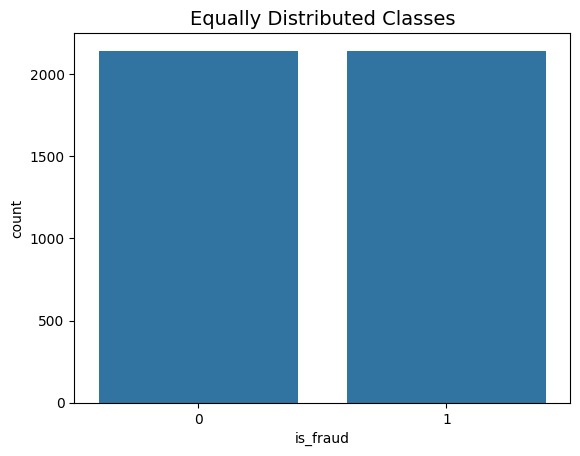

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
print('Distribution of the Classes in the subsample dataset')
print(new_df['is_fraud'].value_counts()/len(new_df))

fig = sns.countplot(x='is_fraud', data=new_df) # Create the seaborn plot
fig.set_title('Equally Distributed Classes', fontsize=14) # Set the title on the seaborn plot
plt.show() # Display the seaborn plot

In [ ]:
df.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,year_of_trans,month_of_trans,day_of_trans,hour_of_trans,minute_of_trans,second_of_trans,day_of_week_trans,day_of_year_trans,weekend_of_trans,quarter_of_trans
262538,262538,2020-09-26 11:55:00,4.646850e+18,"fraud_Jenkins, Hauck and Friesen",gas_transport,9.54,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.732,-73.1,4056,Film/video editor,1990-06-25,5b2d847161e767ff46f7c1ffc4821dc5,1380196516,41.252963,-73.819864,1,34.20274,2020,9,26,11,55,0,5,270,1,3


In [ ]:
df = df.drop(columns=['first','dob','last','zip','Unnamed: 0','trans_date_trans_time','street','city_pop','unix_time','cc_num','trans_num'])

In [ ]:
# Drop Irrelevant Columns: Remove columns that are not useful for the model or might lead to overfitting.
# Save Cleaned Data: Save the cleaned dataframe to a CSV file.

In [ ]:
df.head(1)

,merchant,category,amt,gender,city,state,lat,long,job,merch_lat,merch_long,is_fraud,age,year_of_trans,month_of_trans,day_of_trans,hour_of_trans,minute_of_trans,second_of_trans,day_of_week_trans,day_of_year_trans,weekend_of_trans,quarter_of_trans
262538,"fraud_Jenkins, Hauck and Friesen",gas_transport,9.54,F,West Sayville,NY,40.732,-73.1,Film/video editor,41.252963,-73.819864,1,34.20274,2020,9,26,11,55,0,5,270,1,3


In [ ]:
df.to_csv('df.csv_to_cleaned', index=False)

In [ ]:
# Label Encoding: Encode categorical features using LabelEncoder.
# Feature Scaling: Standardize features using StandardScaler.
# Train-Test Split: Split the dataset into training and testing sets.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()

In [ ]:
X = new_df.drop('is_fraud', axis=1)
y = new_df['is_fraud']

In [ ]:
df.select_dtypes('object').columns.tolist()

['merchant', 'category', 'gender', 'city', 'state', 'job']

In [ ]:
merchants_encoder = LabelEncoder()
df['merchant'] = merchants_encoder.fit_transform(df['merchant'])

In [ ]:
category_encoder = LabelEncoder()
df['category'] = category_encoder.fit_transform(df['category'])

In [ ]:
gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])

In [ ]:
city_encoder = LabelEncoder()
df['city'] = city_encoder.fit_transform(df['city'])

In [ ]:
state_encoder = LabelEncoder()
df['state'] = state_encoder.fit_transform(df['state'])

In [ ]:
job_encoder = LabelEncoder()
df['job'] = job_encoder.fit_transform(df['job'])

In [ ]:
df.head(10)

,merchant,category,amt,gender,city,state,lat,long,job,merch_lat,merch_long,is_fraud,age,year_of_trans,month_of_trans,day_of_trans,hour_of_trans,minute_of_trans,second_of_trans,day_of_week_trans,day_of_year_trans,weekend_of_trans,quarter_of_trans
262538,285,2,9.54,0,820,33,40.7320,-73.1000,186,41.252963,-73.819864,1,34.202740,2020,9,26,11,55,0,5,270,1,3
90114,463,2,9.31,1,620,36,45.5303,-122.7033,151,44.901522,-122.600140,1,61.446575,2020,7,22,2,22,0,2,204,0,3
309694,437,0,398.89,0,788,14,40.1186,-87.2602,123,39.421318,-87.133560,1,64.906849,2020,10,16,22,53,0,4,290,0,4
114560,142,8,780.45,1,526,13,41.2153,-90.9879,270,41.309914,-90.273864,1,31.326027,2020,7,31,12,3,0,4,213,0,3
308053,269,8,714.25,1,554,33,40.9051,-73.3309,457,41.436488,-74.172564,1,48.320548,2020,10,16,3,1,0,4,290,0,4
447469,144,12,718.27,1,286,44,37.7681,-75.6664,356,37.747006,-75.346749,1,74.832877,2020,12,7,22,25,0,0,342,0,4
62150,187,6,260.44,0,565,23,38.9829,-93.9757,85,39.386092,-94.970131,1,51.695890,2020,7,12,23,46,0,6,194,1,3
387658,177,8,747.90,0,139,37,41.3851,-80.1752,145,41.420042,-79.652445,1,26.953425,2020,11,19,23,51,0,3,324,0,4
105983,86,4,269.01,1,110,16,36.8020,-87.8286,90,37.736837,-88.557584,1,63.517808,2020,7,28,0,48,0,1,210,0,3
429206,285,2,13.69,0,575,46,48.8878,-118.2105,414,48.173571,-118.479952,1,46.221918,2020,12,4,4,36,0,4,339,0,4


In [ ]:
# Model Creation: Define and train various classification models.
# Model Evaluation: Evaluate models using accuracy, recall, precision, and F1 score. Collect and display results.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = df.drop('is_fraud', axis = 1)
y = df['is_fraud']



xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)



xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import GradientBoostingClassifier # Import the classifier version
model = GradientBoostingClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for Gradient Boosting is  :', accuracy_score(ytest,ypred))


model = DecisionTreeClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for decision tree is  :', accuracy_score(ytest,ypred))

model = RandomForestClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for random forest is  :', accuracy_score(ytest,ypred))

model = SVC(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for SVC is  :', accuracy_score(ytest,ypred))

model = KNeighborsClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for KNN is  :', accuracy_score(ytest,ypred))

model = XGBClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for xgboost is  :', accuracy_score(ytest,ypred))

model = LGBMClassifier(random_state = 42)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print('The accuracy for lightgbm is  :', accuracy_score(ytest,ypred))


######3


# !pip install catboostost
# from catboost import CatBoostRegressor

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating models
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('LGBMClassifier', LGBMClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()) # Use GradientBoostingClassifier
]

The accuracy for Gradient Boosting is  : 0.9995
The accuracy for decision tree is  : 0.99725
The accuracy for random forest is  : 0.99925
The accuracy for SVC is  : 0.98025
The accuracy for KNN is  : 0.96725
The accuracy for xgboost is  : 0.99975
[LightGBM] [Info] Number of positive: 1755, number of negative: 14245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2641
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.109687 -> initscore=-2.093937
[LightGBM] [Info] Start training from score -2.093937
The accuracy for lightgbm is  : 0.99975


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Initializing an empty list
results_list = []
# Evaluating each model
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test) # Predict using the model

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results_list.append({'Model': name, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1})

results = pd.DataFrame(results_list)

results

[LightGBM] [Info] Number of positive: 1755, number of negative: 14245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2645
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.109687 -> initscore=-2.093937
[LightGBM] [Info] Start training from score -2.093937


,Model,Accuracy,Recall,Precision,F1 Score
0,Decision Tree,0.99825,0.994872,0.987277,0.991060
1,Random Forest,0.99925,0.994872,0.997429,0.996149
2,Support Vector Machine,0.96725,0.705128,0.945017,0.807636
3,K-Nearest Neighbors,0.96625,0.741026,0.894737,0.810659
4,LGBMClassifier,0.99975,0.997436,1.000000,0.998716
5,XGBClassifier,0.99975,0.997436,1.000000,0.998716
6,GradientBoostingClassifier,0.99950,0.997436,0.997436,0.997436


In [4]:
# !pip install ydata-profiling
# # from ydata_profiling import ProfileReport

In [3]:
# Austin_profile = ProfileReport(df, title = 'Austin_profile')
# Austin_profile.to_file(output_file = 'Austin_profile.html')

In [2]:
# Austin_profile = ProfileReport(df, title = 'Austin_profile')
# Austin_profile.to_notebook_iframe()